In [ ]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from scipy import stats

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Pour les graphiques un peu plus joli
try:
  import seaborn as sns
  sns.set(style='whitegrid')
except ImportError:
  sns = None

#Afficher plus lisible
pd.set_option("display.max_columns", None)


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/microsoft/Science des données pour débutants/Formation_Statistique/ecommerce_dataset.csv')

In [ ]:
df.head()

,client_id,sexe,âge,revenu_mensuel,segment_age,revenu_cat,produit,canal_achat,montant_panier,panier_frequent,note_satisfaction,retour_produit,date_achat
0,1,Homme,50,3893.70,Mature,Moyen,Sport,Mobile,83.27,Non,2,Non,2023-05-28
1,2,Femme,39,2885.15,Adulte,Moyen,Électronique,Mobile,47.18,Oui,3,Non,2023-01-13
2,3,Homme,44,2369.53,Mature,Moyen,Sport,Mobile,72.28,Oui,4,Non,2023-03-13
3,4,Homme,38,3197.92,Adulte,Moyen,Électronique,Mobile,54.59,Non,3,Non,2023-05-07
4,5,Homme,20,3774.66,Jeune,Moyen,Sport,Mobile,75.30,Non,4,Non,2023-07-04


In [ ]:
#Les types de données
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   client_id          15000 non-null  int64  
 1   sexe               15000 non-null  object 
 2   âge                15000 non-null  int64  
 3   revenu_mensuel     15000 non-null  float64
 4   segment_age        15000 non-null  object 
 5   revenu_cat         15000 non-null  object 
 6   produit            15000 non-null  object 
 7   canal_achat        15000 non-null  object 
 8   montant_panier     15000 non-null  float64
 9   panier_frequent    15000 non-null  object 
 10  note_satisfaction  15000 non-null  int64  
 11  retour_produit     15000 non-null  object 
 12  date_achat         15000 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 1.5+ MB


des variables quantitatives : âge, revenu_mensuel, montant_panier, note_satisfaction ;


des variables qualitatives : sexe, segment_age, revenu_cat, produit, canal_achat, panier_frequent, retour_produit.

# Analyse univariée des variables quantitatives

Une variable quantitative peut être résumée selon plusieurs axes :
tendance centrale, dispersion, position, forme, visualisation

In [ ]:
# on extrait la variable quantitative a analyser
serie = df['montant_panier']
serie.describe()

,montant_panier
count,15000.000000
mean,93.357107
std,66.260809
min,10.320000
25%,48.310000
50%,73.530000
75%,117.295000
max,929.970000


**Interprétation :**

Si la moyenne et la médiane sont proches, la distribution est souvent relativement symétrique.

Si la moyenne est nettement > médiane → asymétrie à droite (queue à droite).

Si la moyenne est nettement < médiane → asymétrie à gauche.

**À retenir**

Une analyse univariée quantitative répond à 5 questions clés :

Quel est le niveau moyen ? → moyenne, médiane

Quelle est la variabilité ? → variance, écart-type, étendue

Comment se répartissent les observations ? → quartiles, quantiles, IQR

Quelle est la forme de la distribution ? → skewness, kurtosis

Comment visualiser efficacement ? → histogramme, KDE, boxplot

# Mesures de dispersion

Les mesures de dispersion indiquent à quel point les valeurs sont dispersées autour de la moyenne.

*   variance

*   Écart-type : racine carrée de la variance

*  Étendue : max - min
* Coefficient de variation (CV): Permet de comparer la dispersion relativement à la moyenne.






In [ ]:
# calcul de la variance, de l'ecart-type et de l'etendu et du  CV

median_value = serie.median()
variance = serie.var(ddof=1)
std_dev = serie.std(ddof=1)
vmin = serie.min()
vmax = serie.max()
etendu = vmax - vmin
cv = (std_dev / median_value) * 100

print(f"Variance: {variance:.2f}")
print(f"Ecart-type: {std_dev:.2f}")
print(f"Min: {vmin:.2f}")
print(f"Max: {vmax:.2f}")
print(f"Etendu: {etendu:.2f}")
print(f"CV: {cv:.2f} %")

Variance: 4390.49
Ecart-type: 66.26
Min: 10.32
Max: 929.97
Etendu: 919.65
CV: 90.11 %


In [ ]:
# Analyse

# Les valeur en moyennes du panier s'ecarte environ de 66.26 euro autour de la valeur de la moyenne (93 euro)
# c'est a dire on a une dispersion de 66.26 euro en moyenne
# La valeur (prix) minimun est de 10.32 euro
# La valeur (prix) maximun est de 929.97 euro
# L"etendu nous montre on a une grande dispersion des données
# le CV nous montre qu'on a une grande variabilité avec 90.11 %

# Quartiles, quantiles, IQR et outliers

Pour analyser la répartition d’une variable quantitative, on utilise des mesures de position : quartiles, quantiles, IQR et bornes d’outliers.

**Quartiles (Q1, Q2, Q3)**

Les quartiles découpent la distribution en 4 segments de même effectif :

* Q1 (1er quartile) : 25% des valeurs sont en dessous
* Q2 (médiane) : 50% des valeurs sont en dessous
* Q3 (3e quartile) : 75% des valeurs sont en dessous

Ils permettent de comprendre où se concentre la majorité des données.

In [ ]:
# Calcul des quartiles, de l'IQR et des bornes pour detecter les outliers

q1 = serie.quantile(0.25)
q2 = serie.quantile(0.50)
q3 = serie.quantile(0.75)

print(f"Q1: {q1:.2f}")
print(f"Q2 (mediane): {q2:.2f}")
print(f"Q3: {q3:.2f}")

Q1: 48.31
Q2 (mediane): 73.53
Q3: 117.30


Analyse:

on observe que 25% des achats on une valeur plus faible que 48.32 (Q1) euro.

50% ont depensé plus de 73.53(Q2) euro

75% des achat ont une valuer plus faible que 117.30 (Q3) euro


# Quantiles (déciles, percentiles)

Les quantiles généralisent les quartiles en découpant la distribution en k parties égales.

Déciles (D1, D2, …, D9) → 10 segments

Percentiles (P1 à P99) → 100 segments

Utile pour analyser des données très dispersées ou pour créer des groupes (segmentation, scoring, etc.).

In [ ]:
# calcul des deciles

d1 = serie.quantile(0.1)
d5 = serie.quantile(0.5)
d9 = serie.quantile(0.9)

print(f"d1: {d1:.2f}")
print(f"d5: {d5:.2f}")
print(f"d9: {d9:.2f}")

d1: 35.16
d5: 73.53
d9: 177.85


Analyse

On observe que 10% des montant du panier ont des valeur < à 35.16 euro

On observe que 50% des montant du panier ont des valeur < à 73.53 euro

# Visualisations (histogramme, KDE, boxplot)

Les graphiques permettent de voir la distribution :

**Histogramme** : fréquence des valeurs dans des classes ;

**KDE** (Kernel Density Estimation) : estimation lissée de la densité ;

**Boxplot** : résumé visuel (médiane, quartiles, outliers)

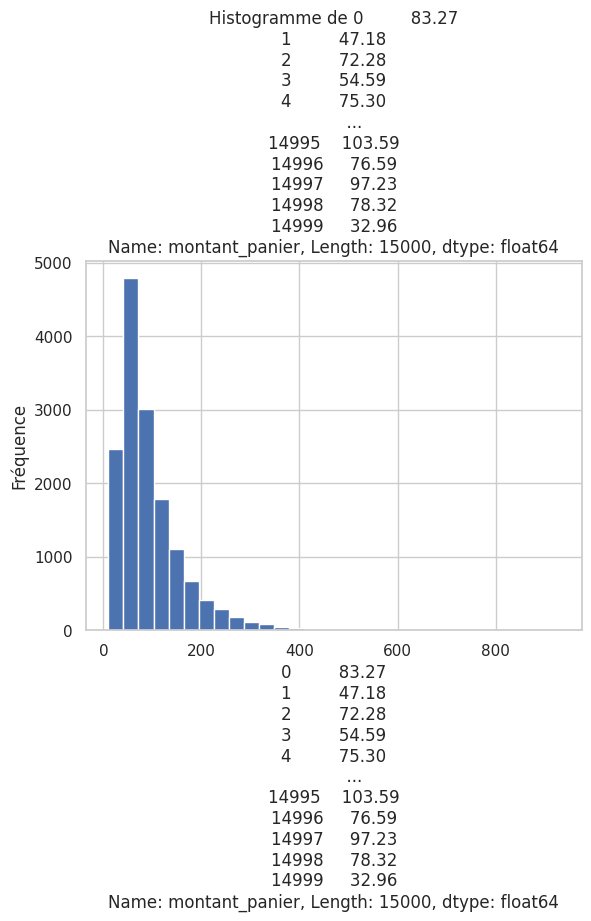

In [ ]:
# Histogramme
variable = df['montant_panier']
plt.figure()
plt.hist(serie, bins=30)
plt.title(f"Histogramme de {variable}")
plt.xlabel(variable)
plt.ylabel('Fréquence')
plt.show()

Analyse

Concentration des données :

La grande majorité des valeurs se concentrent dans la partie gauche du graphique (montants faibles)

Une longue traîne s'étend vers la droite, indiquant la présence de valeurs élevées mais rares

Pic principal : La fréquence maximale (~3000 occurrences) se situe dans la première classe (0-30 €)

Décroissance rapide : La fréquence diminue exponentiellement après le pic initial

Environ 80-85% des paniers semblent avoir un montant inférieur à 200 €

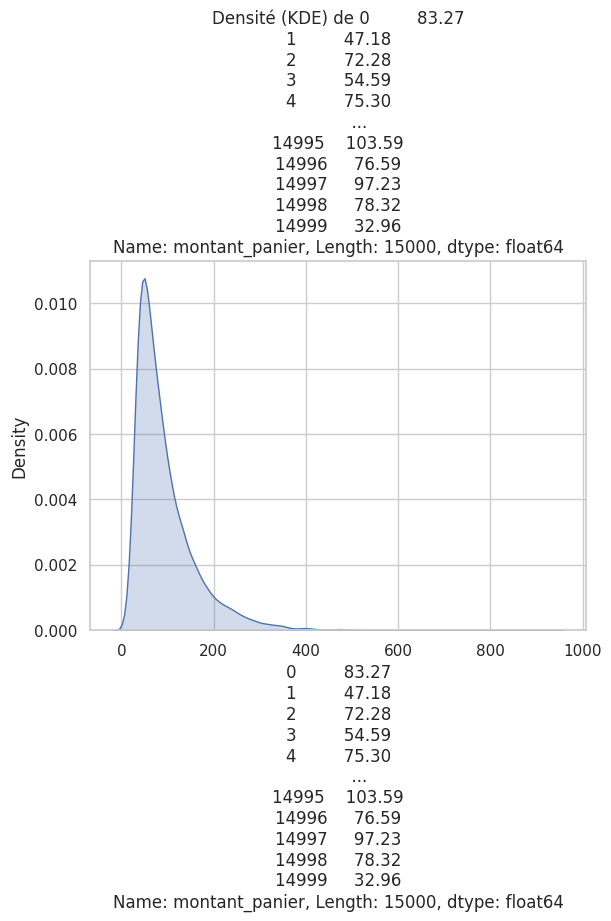

In [ ]:
# Densité (KDE) si seaborn est disponible

if sns is not None:
  plt.figure()
  sns.kdeplot(serie, fill=True)
  plt.title(f"Densité (KDE) de {variable}")
  plt.xlabel(variable)
  plt.show()
else:
  print("Seaborn n'est pas installer")

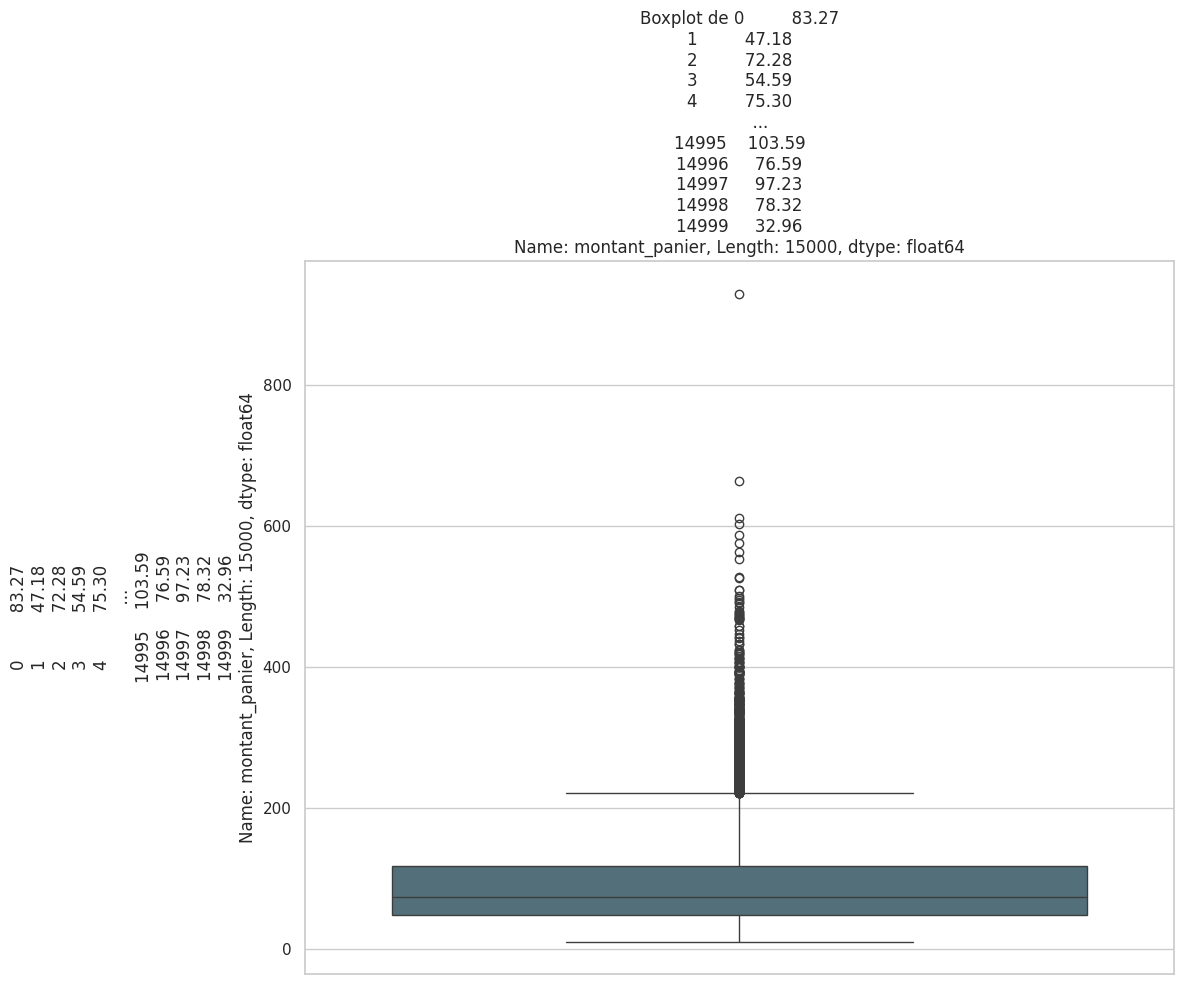

In [ ]:
# Boxplot
import seaborn as sns

sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 10))
sns.boxplot(y=serie, color="#4C7280")

plt.title(f"Boxplot de {variable}")
plt.ylabel(variable)
plt.tight_layout()
plt.show()

Analyse

Ce que nous dit l'Histogramme : "Le volume est dans les petits prix"
L'histogramme montre la fréquence. Plus la barre est haute, plus vous avez de clients dans cette tranche de prix.

Le constat : La grande majorité de vos ventes se situe entre 30 € et 120 €. C'est votre "cœur de réacteur".

L'analyse : Votre activité repose sur un volume massif de petits et moyens paniers. La courbe chute très vite après 200 €, ce qui signifie que vendre au-dessus de ce montant est rare.

2. Ce que nous dit le Boxplot : "Une nuée d'exceptions"
Le Boxplot est très parlant ici à cause de la multitude de petits points au-dessus de la boîte.

Le "Cœur" (La boîte grise) : Elle est très basse et écrasée. Cela confirme que 50 % de vos clients dépensent un montant très précis et serré (environ entre 50 € et 110 €).

Les "Outliers" (Tous les points en haut) : Chaque point est une vente exceptionnelle. Vous en avez énormément !

L'analyse : Bien que vous ayez un panier maximum à 930 €, le graphique montre que c'est un événement totalement isolé (le point tout en haut). Il ne représente pas du tout le comportement habituel.

**IQR (Interquartile Range)**

L’IQR mesure la dispersion centrale des données :

[ IQR = Q_3 - Q_1 ]

Zone contenant 50% des valeurs centrales
Mesure robuste, peu sensible aux valeurs extrêmes
Plus l’IQR est grand → plus la variable est dispersée au centre.

In [ ]:
iqr = q3 - q1

born_inf = q1 - 1.5 * iqr
born_sup = q3 + 1.5 * iqr

print(f"IQR : {iqr:.2f}")
print(f"Bonne inferieur: {born_inf:.2f}")
print(f"Bonne inferieur: {born_sup:.2f}")

outliers = serie[(serie < born_inf) |(serie > born_sup) ]
print(f"Nombre d'outlier détectés: {outliers.shape[0]}")

IQR : 68.98
Bonne inferieur: -55.17
Bonne inferieur: 220.77
Nombre d'outlier détectés: 813


In [ ]:
# Analyse

# Toues les transactions qui ont une valeur plus petites que born_inf(-55.17) n'hesiste pas dans la BDD
# Lorsque j'ai des valeurs qui sont superieur a la born_sup(220.77); on a des valeur extréme

# Forme de la distribution : asymétrie et aplatissement

Deux indicateurs classiques :

**Asymétrie (skewness)** : mesure la symétrie de la distribution.

skewness ≈ 0 → distribution à peu près symétrique ;

skewness > 0 → queue à droite ;

skewness < 0 → queue à gauche.

**Aplatissement (kurtosis)** : mesure la forme des queues de distribution.

kurtosis ≈ 0 (en version « excess kurtosis ») → proche de la loi normale ;

kurtosis > 0 → distribution plus « pointue », queues plus lourdes ;

kurtosis < 0 → distribution plus « plate ».

In [ ]:
# Calcul de l'asymétrie et de l'aplatissement

skewness = serie.skew()
kurtosis = serie.kurtosis()

print(f"Skewness (asymetrie): {skewness:.2f}")
print(f"kurtosis (aplatissement): {kurtosis:.2f}")

Skewness (asymetrie): 2.15
kurtosis (aplatissement): 7.74


In [ ]:
#Analyse

# la Skewness est egal a 2.15 > 0 donc la distribution n'est pas normale
# La kurtosis (aplatissement) est egale a 7.74 > 0 donc la distribution est plus pointu

# 1.2 — Variable qualitative

Une variable qualitative décrit des catégories : sexe, produit, canal d'achat, etc.

On distingue :

* les variables nominales (sans ordre naturel : couleur, pays…)
* les variables ordinales (avec ordre logique : faible/moyen/fort, notes 1–5…)

**À retenir**

Une analyse univariée qualitative répond à 4 questions clés :

1. Quel est le type de variable ? → nominale ou ordinale
2. Comment se répartissent les catégories ? → effectifs, proportions
3. Quelle catégorie domine ? → mode, concentration
4. Comment visualiser efficacement ? → barplot, countplot, treemap, pie chart (rarement)

Pour illustrer, nous allons utiliser la variable **canal_achat**

In [ ]:
# Variable qualitative

var_quali = 'canal_achat'
serie_quali = df[var_quali].astype('category')

## serie_quali.cat.categories
serie_quali.head()

,canal_achat
0,Mobile
1,Mobile
2,Mobile
3,Mobile
4,Mobile


In [ ]:
# Effectifs de chaque categorie

effectifs = serie_quali.value_counts()
effectifs

,count
canal_achat,
Mobile,6030
Desktop,4418
Email,3042
App,1510


In [ ]:
# Proportion en %
proportions = serie_quali.value_counts(normalize=True) * 100
proportions

,proportion
canal_achat,
Mobile,40.200000
Desktop,29.453333
Email,20.280000
App,10.066667


In [ ]:
# Analyse
# 40% des des ventes se font via le MObile.
# 29% des des ventes se font via le Desktop.
# 20% des des ventes se font via le Email.
# 10% des des ventes se font via le App.


**Graphiques : barplot, pie chart**

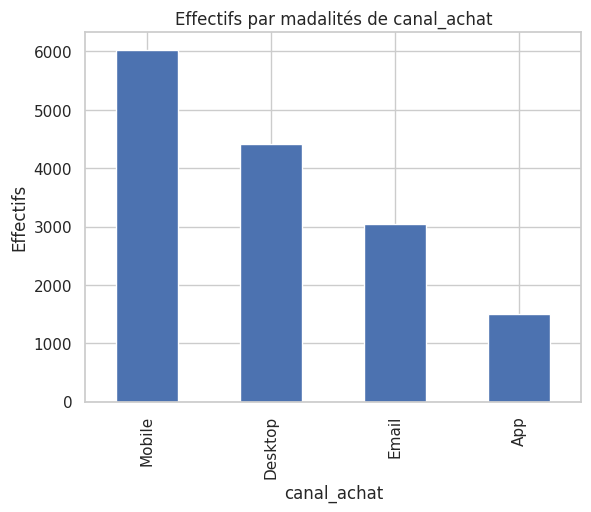

In [ ]:
# Diagramme en barres (barplot)

plt.figure()
effectifs.plot(kind='bar')
plt.title(f"Effectifs par madalités de {var_quali}")
plt.xlabel(var_quali)
plt.ylabel('Effectifs')
plt.xticks()
plt.show()

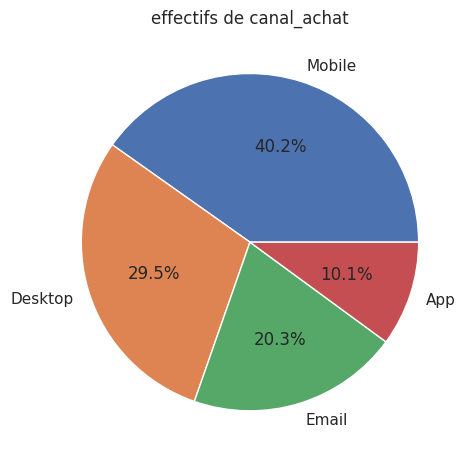

In [ ]:
# Diagramme circulaire (pie chart)

plt.figure()
effectifs.plot(kind="pie", autopct="%1.1f%%")
plt.title(f"effectifs de {var_quali}")
plt.ylabel("")  # on enlève le label par défaut
plt.tight_layout()
plt.show()

# Récapitulatif de la Partie 1 — Statistique univariée

Nous avons vu comment, pour une seule variable :

* décrire le niveau moyen (moyenne, médiane, mode) ;
* mesurer la dispersion (variance, écart-type, étendue, coefficient de variation) ;
* utiliser les quartiles et l’IQR pour détecter des outliers ;
* analyser la forme de la distribution (skewness, kurtosis) ;
*  décrire une variable qualitative (effectifs, proportions, barplot, pie chart) ;
* tester la normalité (Shapiro–Wilk, KS, Q-Q plot) et décider si une approximation normale est raisonnable.

Vous pouvez maintenant appliquer ces outils à d’autres variables du jeu de données :

* changez variable pour analyser âge, revenu_mensuel, note_satisfaction, etc. ;
* changez var_quali pour analyser sexe, produit, segment_age, etc.

Echantillonnage & Biais en Statistique

Definiion
Un Echantillonnage est un sous-ensemble de la population utilisé pour:
* Estimer des parametres
* Modeliser des comportements
* Comprendre de population totale


